# Class imbalance

## 1. Preprocessing

In [1]:
from sys import version as python_version
from sklearn import __version__ as sklearn_version
from pandas import __version__ as pandas_version
from matplotlib import __version__ as matplotlib_version
from numpy import __version__ as numpy_version
from imblearn import __version__ as imblearn_version

print('python version:', python_version)
print('sklearn version:', sklearn_version)
print('pandas version:', pandas_version)
print('matplotlib version', matplotlib_version)
print('numpy version', numpy_version)
print('imblearn version', imblearn_version)

python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
sklearn version: 0.24.1
pandas version: 1.2.3
matplotlib version 3.3.2
numpy version 1.19.2
imblearn version 0.8.0


In [2]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df_x = df.drop('Class', axis=1)
df_y = df['Class']

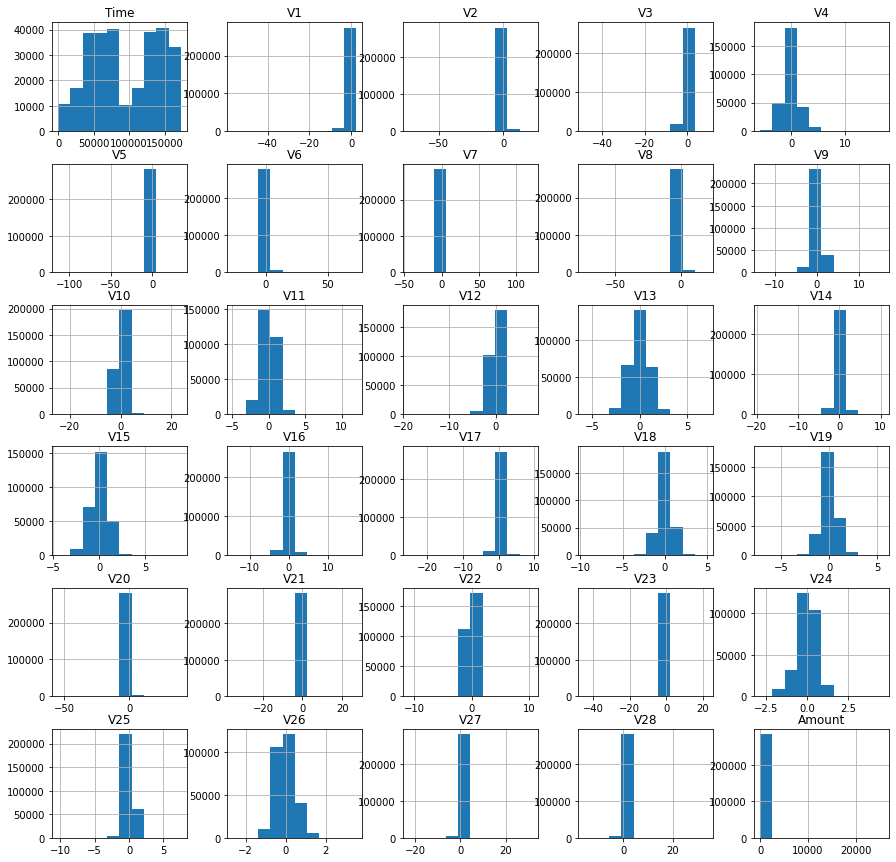

In [7]:
import matplotlib.pyplot as plt

df_x.hist(figsize=(15, 15))
plt.show()

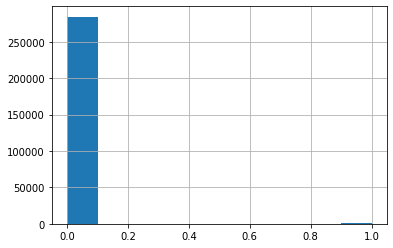

In [8]:
df_y.hist()
plt.show()

In [9]:
import numpy as np

X = df.drop('Class', axis=1)
y = df['Class']

print('X.shape =', X.shape)
print('y.shape =', y.shape)
print('Negative examples =', np.count_nonzero(y == 0))
print('Positive examples =', np.count_nonzero(y == 1))

X.shape = (284807, 30)
y.shape = (284807,)
Negative examples = 284315
Positive examples = 492


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [11]:
print('x_train.shape =', x_train.shape)
print('x_test.shape =', x_test.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (213605, 30)
x_test.shape = (71202, 30)
y_train.shape = (213605,)
y_test.shape = (71202,)


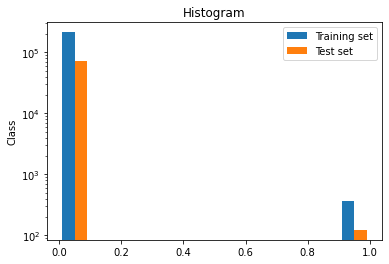

In [12]:
plt.hist((y_train, y_test), label=('Training set', 'Test set'), rwidth=0.8, log=True)
plt.title('Histogram')
plt.ylabel('Class')
plt.legend()
plt.show()

## 2 Model evaluation

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score
from imblearn.metrics import geometric_mean_score
from time import time
import pickle

all_results = []

def get_params_str(params):
    params_str = ''
    for param, val in params.items():
        if params_str != '':
            params_str += ', '
        params_str += param.split('__')[1]
        params_str += ' = '
        if isinstance(val, float):
            params_str += '{:.4f}'.format(val)
        else:
            params_str += str(val)
    return params_str

def evaluate_model(model_name, pipeline, param_grid):
    t0 = time()

    search = GridSearchCV(pipeline, param_grid, n_jobs=-1,
                          scoring=make_scorer(fbeta_score, beta=2), verbose=1)
    search.fit(x_train, y_train)
    
    print('Best parameters:', search.best_params_)
    print('Best score:', search.best_score_)
    
    y_pred = search.predict(x_test)
    
    results = [
        ('Model', model_name),
        ('Accuracy', accuracy_score(y_test, y_pred)),
        ('Balanced Accuracy', balanced_accuracy_score(y_test, y_pred)),
        ('Geometric Mean', geometric_mean_score(y_test, y_pred)),
        ('Recall', recall_score(y_test, y_pred)),
        ('Precision', precision_score(y_test, y_pred)),
        ('F1', f1_score(y_test, y_pred)),
        ('F2', fbeta_score(y_test, y_pred, beta=2)),
    ]
    
    for label, val in results:
        print(label + ':', val)
    
    print('t = {:.1f} min'.format((time() - t0)/60))
    
    all_results.append(results)
    
    filename = 'class_imbalance_' + model_name.replace(' ', '_') + '.pkl'
    pickle.dump(search.best_estimator_, open(filename, 'wb'))

### 2.1 Naive Approach - Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=0, n_jobs=-1))
])

param_grid = {
    'rf__n_estimators': (20, 50, 100),
    'rf__max_depth': list(np.arange(3, 23, 2)) + [None],
}

evaluate_model('Random Forest', pipeline, param_grid)

Fitting 5 folds for each of 33 candidates, totalling 165 fits
Best parameters: {'rf__max_depth': 17, 'rf__n_estimators': 50}
Best score: 0.823646024220839
Model: Random Forest
Accuracy: 0.9994663071262043
Balanced Accuracy: 0.8698764926280926
Geometric Mean: 0.8601017070047723
Recall: 0.7398373983739838
Precision: 0.9381443298969072
F1: 0.8272727272727273
F2: 0.7724957555178268
t = 23.3 min


### 2.2 Over-sampling - SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

t0 = time()

pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('sm', SMOTE(random_state=0)),
    ('rf', RandomForestClassifier(random_state=0, n_jobs=-1))
])

param_grid = {
    'sm__k_neighbors': (3, 5, 7),
    'rf__n_estimators': (20, 50, 100),
    'rf__max_depth': list(np.arange(3, 23, 2)) + [None],
}

evaluate_model('SMOTE', pipeline, param_grid)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best parameters: {'rf__max_depth': 21, 'rf__n_estimators': 100, 'sm__k_neighbors': 7}
Best score: 0.831401617426075
Model: SMOTE
Accuracy: 0.9993679952810315
Balanced Accuracy: 0.9104073138819431
Geometric Mean: 0.9060201457520742
Recall: 0.8211382113821138
Precision: 0.8145161290322581
F1: 0.8178137651821863
F2: 0.819805194805195
t = 134.3 min


### 2.3 Under-sampling - NearMiss-1

In [16]:
from imblearn.under_sampling import NearMiss

pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('nm', NearMiss()),
    ('rf', RandomForestClassifier(random_state=0, n_jobs=-2))
])

param_grid = {
    'nm__n_neighbors': (3, 5, 7),
    'rf__n_estimators': (20, 50, 100),
    'rf__max_depth': list(np.arange(3, 23, 2)) + [None],
}

evaluate_model('NearMiss-1', pipeline, param_grid)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best parameters: {'nm__n_neighbors': 3, 'rf__max_depth': 3, 'rf__n_estimators': 20}
Best score: 0.01246582647293817
Model: NearMiss-1
Accuracy: 0.2893879385410522
Balanced Accuracy: 0.6197310858855434
Geometric Mean: 0.5236239509759593
Recall: 0.9512195121951219
Precision: 0.0023073282322316007
F1: 0.004603489996262124
F2: 0.011425781250000003
t = 2.8 min


### 2.4 Ensemble method - Balanced Random Forest

In [17]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('brf', RandomForestClassifier(random_state=0, n_jobs=-1))
])

param_grid = {
    'brf__n_estimators': (20, 50, 100),
    'brf__max_depth': list(np.arange(3, 23, 2)) + [None],
    'brf__class_weight': ('balanced', 'balanced_subsample')
}

evaluate_model('Balanced Random Forest', pipeline, param_grid)

Fitting 5 folds for each of 66 candidates, totalling 330 fits
Best parameters: {'brf__class_weight': 'balanced', 'brf__max_depth': 7, 'brf__n_estimators': 50}
Best score: 0.8269586636863888
Model: Balanced Random Forest
Accuracy: 0.9992415943372377
Balanced Accuracy: 0.9103440040435942
Geometric Mean: 0.9059627653793286
Recall: 0.8211382113821138
Precision: 0.7593984962406015
F1: 0.7890624999999999
F2: 0.8079999999999999
t = 31.6 min


## 3 Results

In [18]:
df_columns = [x[0] for x in all_results[0]]
df_data = [dict(x) for x in all_results]
all_results_df = pd.DataFrame(df_data, columns=df_columns)
all_results_df = all_results_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
all_results_df.set_properties(**{'text-align': 'left'}).hide_index()
all_results_df.to_excel('class_imbalance_results.xlsx')

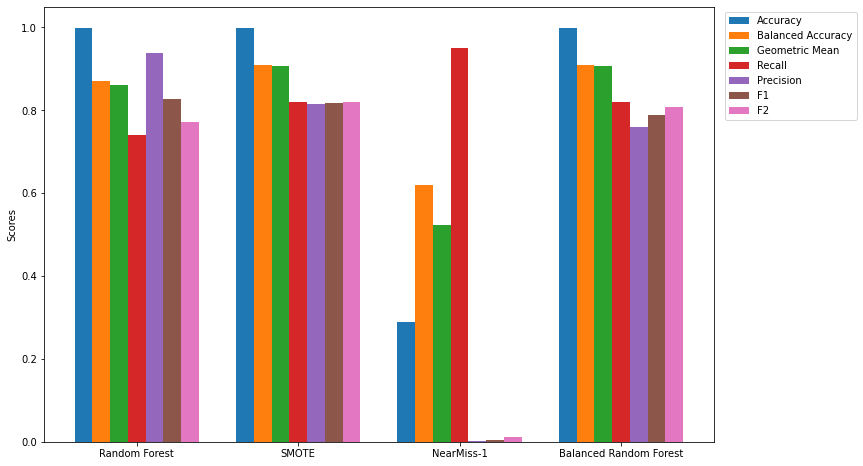

In [19]:
labels = [x[0][1] for x in all_results]
x = np.arange(len(labels))
width = 0.11

fig, ax = plt.subplots()
scores_len = len(all_results[0][1:])
for i in range(scores_len):
    score_label = all_results[0][i+1][0]
    scores = [x[i+1][1] for x in all_results]
    rects = ax.bar(x+(i-scores_len//2)*width, scores, width, label=score_label)

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

fig.set_size_inches(12, 8)

plt.show()